# Problem 1: Perceptron Learning

**1. Standard subgradient descent with the step size γt = 1 for each iteration.**

In [1]:
import numpy as np

# Load Data from perceptron file
data = np.loadtxt('perceptron.data',delimiter=',')
x = data[:, 0:4]
y = data[:, 4:]

In [2]:
def perceptron(step_size, log=True):
    w = np.zeros((1,4))
    b = 0
    losses = []
    i = 1
    while True:
        # Predict
        z = x.dot(w.T) + b
        y_pred = np.sign(z)

        # Gradient descent
        mask = (-1 * y * y_pred) >= 0
        dw = -1 * np.sum(y * x * mask, axis=0)
        db = -1 * np.sum(y * mask)

        if np.all(dw == 0) and db == 0:
            break

        w = w - step_size * dw
        b = b - step_size * db
        
        if i in [1,2,3] and log:
            print('Iteration', i, 'Weights', w, 'Bias', b)

        # Loss
        z = x.dot(w.T) + b
        loss_fn = -1 * y * z
        loss_fn = loss_fn * (loss_fn > 0)
        loss = np.sum(loss_fn)
        #print("Iteration", i, "Loss", loss)
        #print("----------------------------------------------------")
        losses.append(loss)
        i += 1
    
    if log:
        print('Final Iteration - ', i, 'Step size - ', step_size, 'Weights - ', w, 'Bias - ', b)
    return losses

print('Standard Gradient Descent')
losses = perceptron(1)

Standard Gradient Descent
Iteration 1 Weights [[ 1278.99646108   460.06125801  -108.55851404 -1672.31572948]] Bias -354.0
Iteration 2 Weights [[ 1307.29472974   432.74778799   -27.55191988 -1523.78895446]] Bias -493.0
Iteration 3 Weights [[ 1255.18981362   425.50402882    18.7965404  -1434.66754197]] Bias -625.0
Final Iteration -  47 Step size -  1 Weights -  [[ 685.79932892  243.89947473    8.24199193 -797.62505314]] Bias -  -1485.0


**2. Stochastic subgradient descent where exactly one component of the sum is chosen to approximate the gradient at each iteration. Instead of picking a random component at each iteration,
you should iterate through the data set starting with the first element, then the second, and
so on until the Mth element, at which point you should start back at the beginning again.
Again, use the step size γt = 1.**

In [3]:
def sgd_perceptron(step_size):
    w = np.zeros((1,4))
    b = 0
    
    epoch = 1
    losses = []
    i = 0
    while True:
        # Predict
        z = x.dot(w.T) + b
        y_pred = np.sign(z)

        # SGD on i-th data point
        mask = (-1 * y[i] * y_pred[i]) >= 0
        dw = -1 * (y[i] * x[i] * mask) / len(y[i])
        db = -1 * (y[i] * mask) / len(y[i])
        
        w = w - step_size * dw
        b = b - step_size * db
        
        if epoch in [1] and i in [1,2,3]:
                print('Epoch - ', epoch, 'Iteration - ', i, 'Weights - ', w, 'Bias - ', b)

        # Loss
        i += 1
        if i % 1000 == 0:
            if epoch in [1,2,3]:
                print('Epoch - ', epoch, 'Weights - ', w, 'Bias - ', b)
            
            z = x.dot(w.T) + b
            loss_fn = -1 * y * z
            loss_fn = loss_fn * (loss_fn > 0)
            loss = np.sum(loss_fn)
            losses.append(loss)
            if loss == 0:
                break
            #print("Epoch", epoch, "Loss", loss)
            #print("----------------------------------------------------")
            epoch += 1
            i = 0
    print('Final Epoch', epoch, 'Step size', step_size, 'Weights', w, 'Bias', b)
    return losses
print('Stochastic Gradient Descent')
losses = sgd_perceptron(1)

Stochastic Gradient Descent
Epoch -  1 Iteration -  1 Weights -  [[ 4.61754424  2.46967938  1.96766079 -1.81335551]] Bias -  [-1.]
Epoch -  1 Iteration -  2 Weights -  [[ 3.45322288  0.16943482  2.62801595 -4.64709851]] Bias -  [-2.]
Epoch -  1 Iteration -  3 Weights -  [[ 3.45322288  0.16943482  2.62801595 -4.64709851]] Bias -  [-2.]
Epoch -  1 Weights -  [[ 14.3464317   11.76122503   3.50486354 -14.7532255 ]] Bias -  [-29.]
Epoch -  2 Weights -  [[ 19.10212163   9.03755593   1.82581146 -15.9740875 ]] Bias -  [-35.]
Epoch -  3 Weights -  [[ 18.16588241  11.78406332   2.0444061  -19.32125712]] Bias -  [-44.]
Final Epoch 1091 Step size 1 Weights [[ 149.27714019   52.53347317    1.67167265 -172.89194014]] Bias [-322.]


**3. How does the rate of convergence change as you change the step size? Provide some example
step sizes to back up your statements.**


Rate of convergence does not change as step size changes. It can be observed by plotting the *Iterations vs Losses* in which given any step size the perceptron converges at the same iteration for each step size.

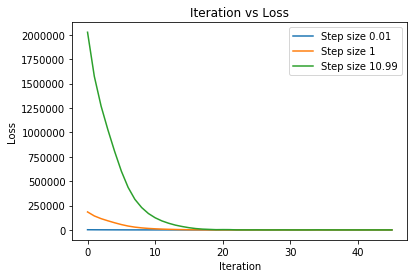

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
step_size_losses = {}
for step_size in [0.01, 1, 10.99]:
    step_size_losses[step_size] = perceptron(step_size, log=False)
    

for key, value in step_size_losses.items():
    plt.plot(value, label='Step size ' + str(key))

plt.title('Iteration vs Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

**4. What is the smallest, in terms of number of data points, two-dimensional data set containing
both class labels on which the algorithm, with step size one, fails to converge? Use this
example to explain why the method may fail to converge more generally.**


The algorithm generally fails to converge when the data is not linearly separable (no values of W and B would yeild a linear separator). This is can be observed when 3 data points are colinear.

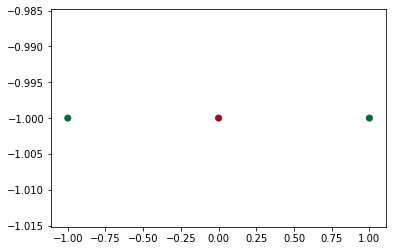

In [14]:
from matplotlib import cm
plt.scatter([-1,0,1], [-1,-1,-1], c = [True, False, True], cmap = cm.RdYlGn)